In [1]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern
import utils.functions as f
from datetime import datetime
import matplotlib.pyplot as plt

START_DATE = datetime(2021, 1, 1) 
END_DATE = datetime(2023, 4, 1)

In [2]:
stock_symbol = 'AAPL'
df = f.get_stock_data(stock_symbol, START_DATE, END_DATE)
df.head()

[*********************100%***********************]  1 of 1 completed


,date,open,high,low,close,adj_close,volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,127.002106,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572311,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244385,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,128.484009,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,129.592972,105158200


In [3]:
dates = df['date'].to_numpy().reshape(-1, 1)
X = np.arange(len(dates)).reshape(-1, 1)
close_prices = df['close'].to_numpy()

# split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(dates))
dates_train, dates_test = dates[:split_index], dates[split_index:]
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = close_prices[:split_index], close_prices[split_index:]

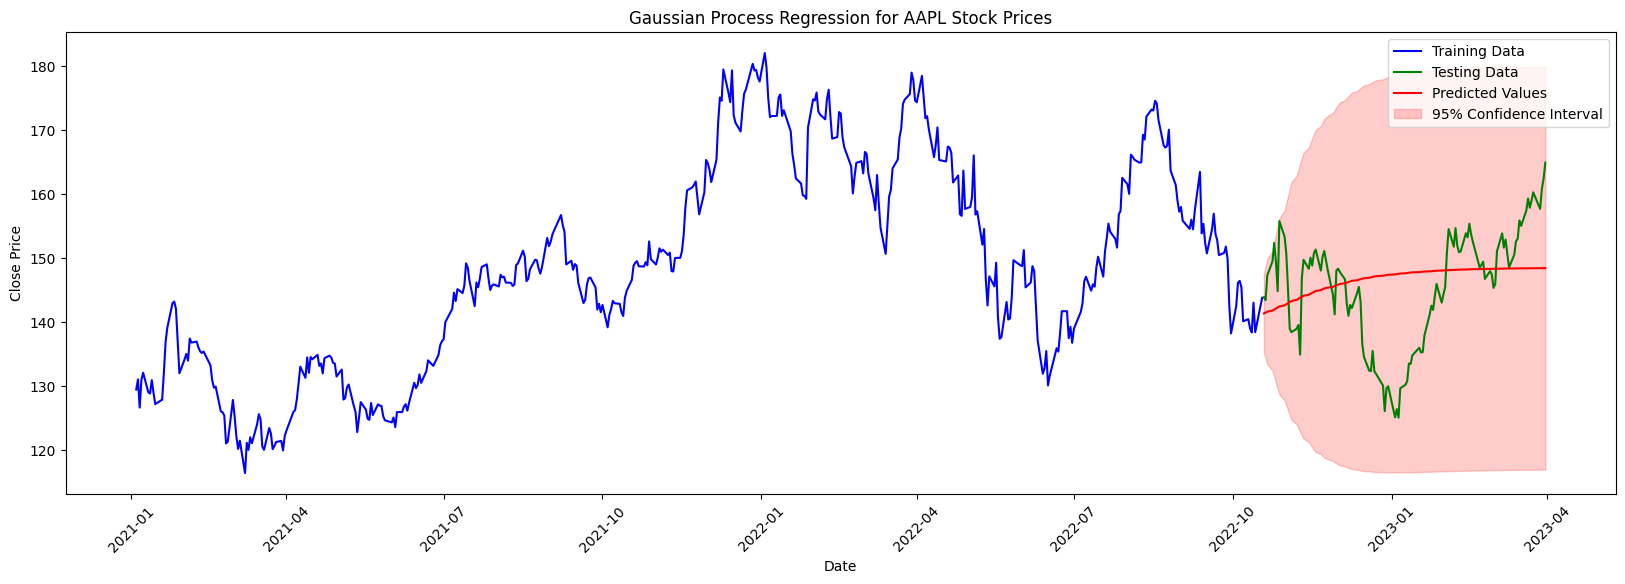

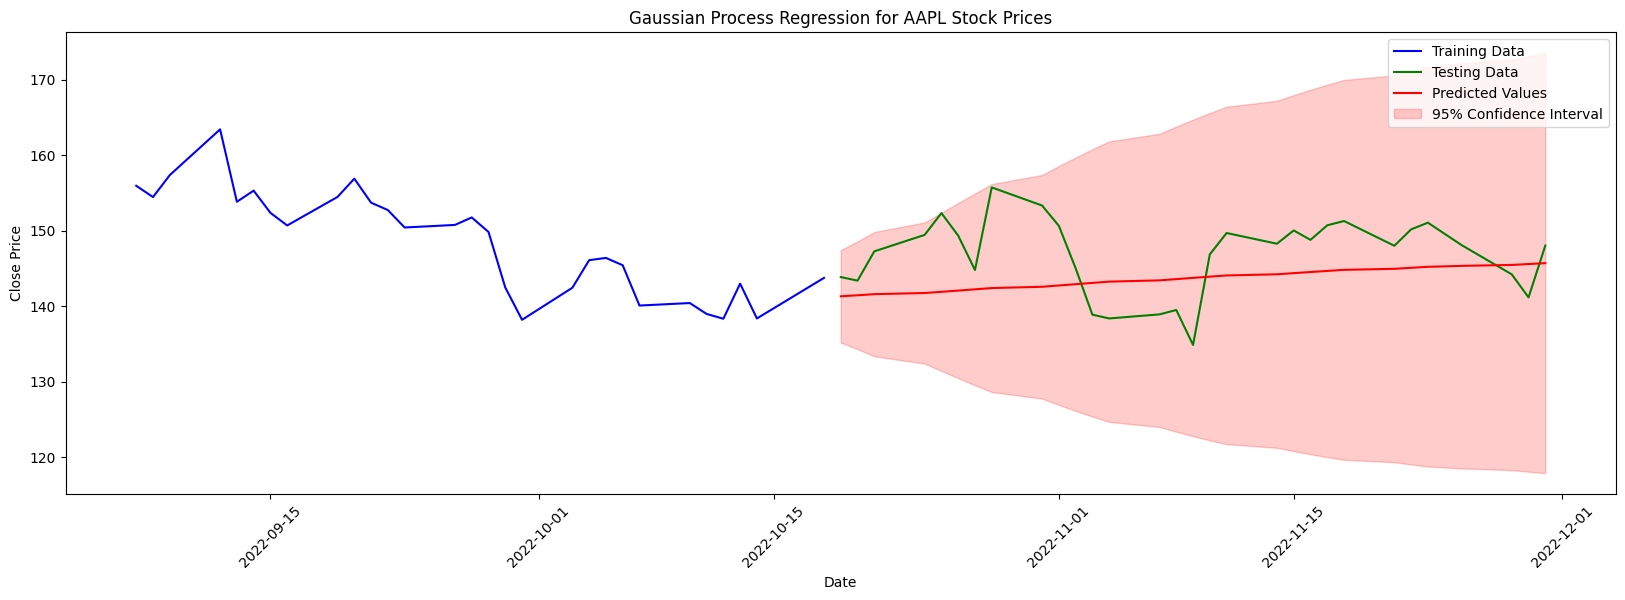

In [4]:
# Define the kernel for Gaussian Process Regression (Kriging)
kernel = Matern(length_scale=1.0, nu=1.5)  # Matern kernel with nu=1.5

# Create Gaussian Process Regressor model
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

# Fit the model to the observed data
model.fit(X_train, y_train)

# Perform predictions
predictions, std_dev = model.predict(X_test, return_std=True)

# Plot the results train + test
plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(dates_train, y_train, 'b', label='Training Data')

# Plot testing data
plt.plot(dates_test, y_test, 'g', label='Testing Data')

# Plot predicted values
plt.plot(dates_test, predictions, 'r-', label='Predicted Values')

# Plot confidence interval
plt.fill_between(dates_test.flatten(), predictions - 1.96*std_dev, predictions + 1.96*std_dev, alpha=0.2, color='r', label='95% Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Gaussian Process Regression for {stock_symbol} Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## zomm in
# only the last days of training and the first days of testing

plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(dates_train[-30:], y_train[-30:], 'b', label='Training Data')

# Plot testing data
plt.plot(dates_test[:30], y_test[:30], 'g', label='Testing Data')

# Plot predicted values
plt.plot(dates_test[:30], predictions[:30], 'r-', label='Predicted Values')

# Plot confidence interval
plt.fill_between(dates_test[:30].flatten(), predictions[:30] - 1.96*std_dev[:30], predictions[:30] + 1.96*std_dev[:30], alpha=0.2, color='r', label='95% Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Gaussian Process Regression for {stock_symbol} Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()



## Predict between hourly data

[*********************100%***********************]  1 of 1 completed


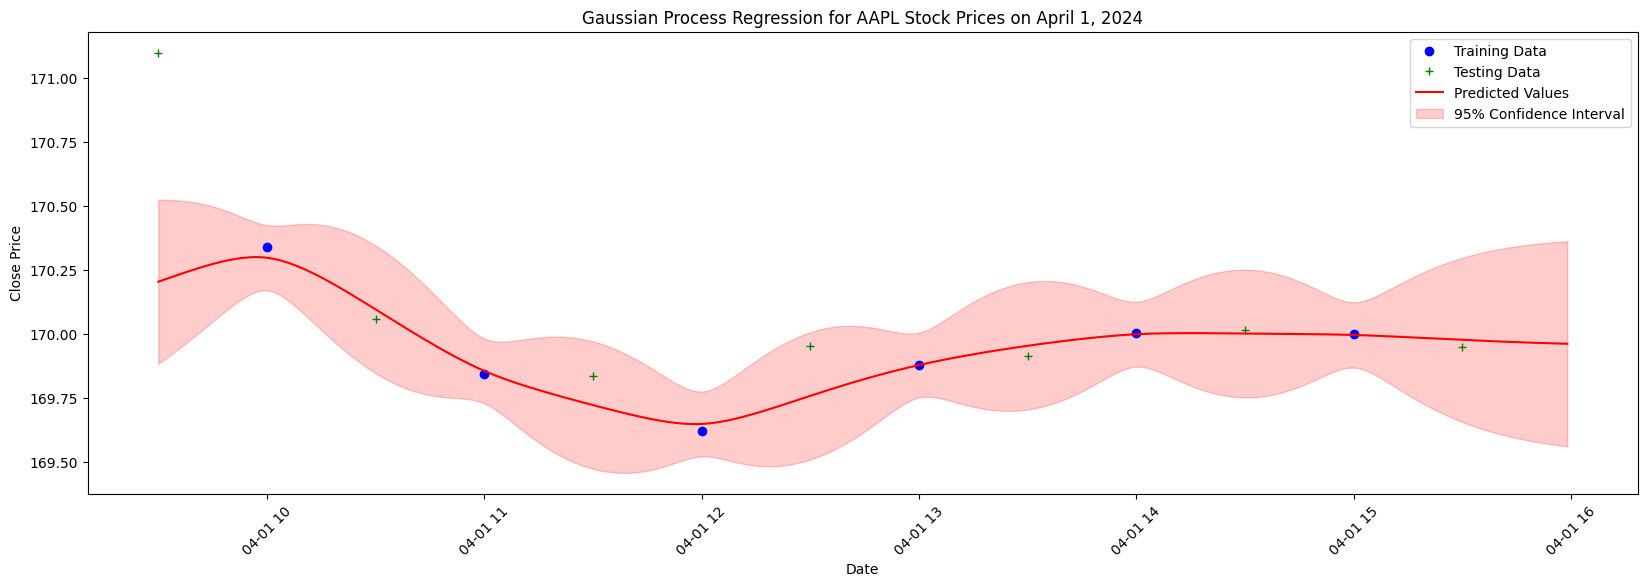

In [5]:
# Get hourly stock data for Apple (AAPL) on April 1, 2024
df = f.get_hourly_stock_data('AAPL', datetime(2024, 4, 1), datetime(2024, 4, 2), interval = "1m")

# :30 is for test purposes, :00 is for training purposes
df['minutes'] = df['date'].dt.minute   

# Extract the training data (minutes ending in :00)
df_train = df[df['minutes'] == 0]
df_test = df[df['minutes'] == 30]

# Convert the dates to a 2D array for scikit-learn
dates_train = df_train['date'].to_numpy().reshape(-1, 1)
dates_test = df_test['date'].to_numpy().reshape(-1, 1)
dates_pred = df['date'].to_numpy()

# X_train is the index of the date
X_train = df[df['minutes'] == 0].index.to_numpy().reshape(-1, 1)
X_test = df[df['minutes'] == 30].index.to_numpy().reshape(-1, 1)
X_pred = df.index.to_numpy().reshape(-1, 1)

# Extract the close prices
close_prices_train = df_train['close'].to_numpy()
close_prices_test = df_test['close'].to_numpy()

# Define the kernel for Gaussian Process Regression (Kriging)
kernel = Matern(length_scale=1.0, nu=1.5)  # Matern kernel with nu=1.5

# Create Gaussian Process Regressor model
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

# Fit the model to the observed data
model.fit(X_train, close_prices_train)

# Perform predictions
predictions, std_dev = model.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(dates_train, close_prices_train, 'bo', label='Training Data')

# Plot testing data
plt.plot(dates_test, close_prices_test, 'g+', label='Testing Data')

# Plot predicted values
plt.plot(df['date'], predictions, 'r-', label='Predicted Values')

# Plot confidence interval
plt.fill_between(dates_pred, predictions - 1.96*std_dev, predictions + 1.96*std_dev, alpha=0.2, color='r', label='95% Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Gaussian Process Regression for AAPL Stock Prices on April 1, 2024')
plt.legend()
plt.xticks(rotation=45)
plt.show()

